## Задание 1.1
1. Сгенерить выборки, соответствующие следующим распределениям:
    - Нормальное,
    - Лапласа,
    - Стьюдента,
    - Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2).
2. На каждой выборке отдельно проверить мощность и консервативность следюущих критериев:
    - Лиллиефорса, 
    - Харке-Бера, 
    - Шапиро-Улика.

In [78]:
from numpy import random as rand
import numpy as np
import scipy.stats as st
from scipy.stats import truncnorm
import matplotlib.pyplot as plt 
from statsmodels.api import stats as sm

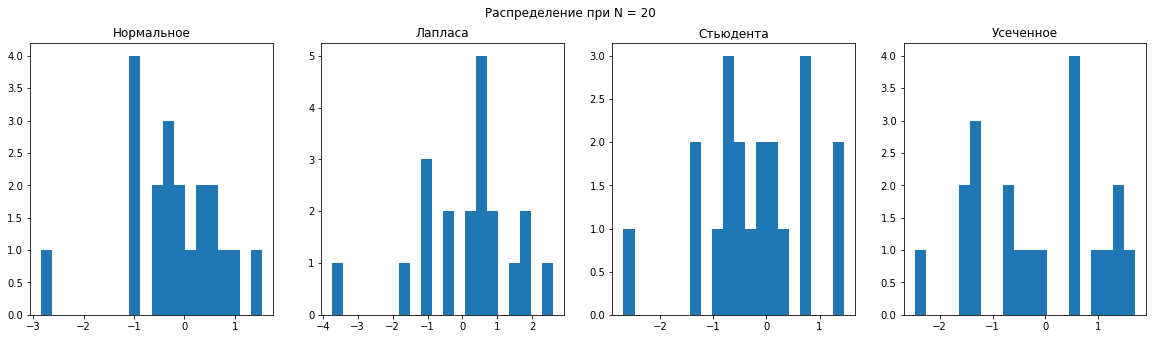

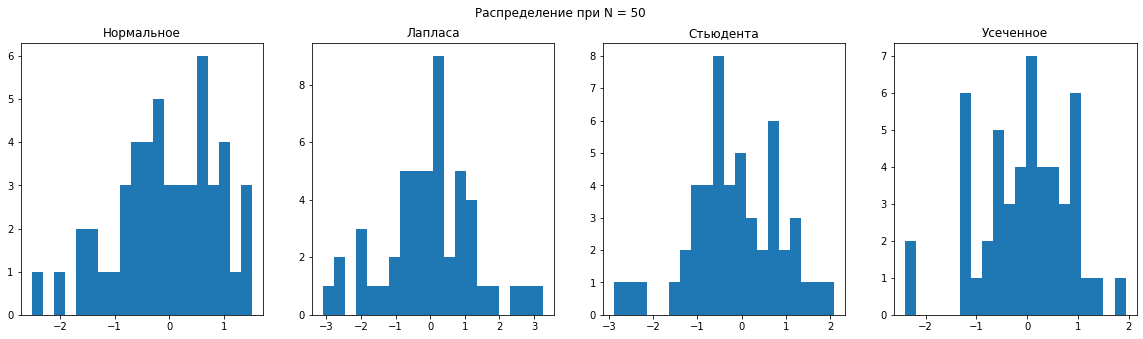

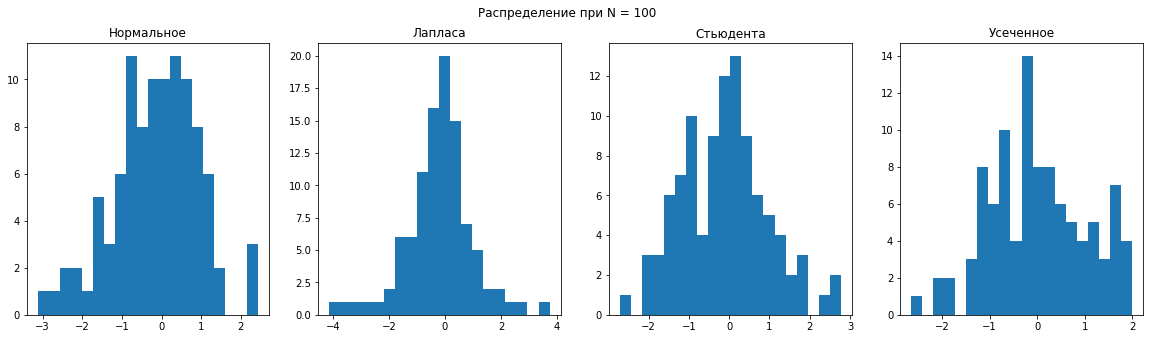

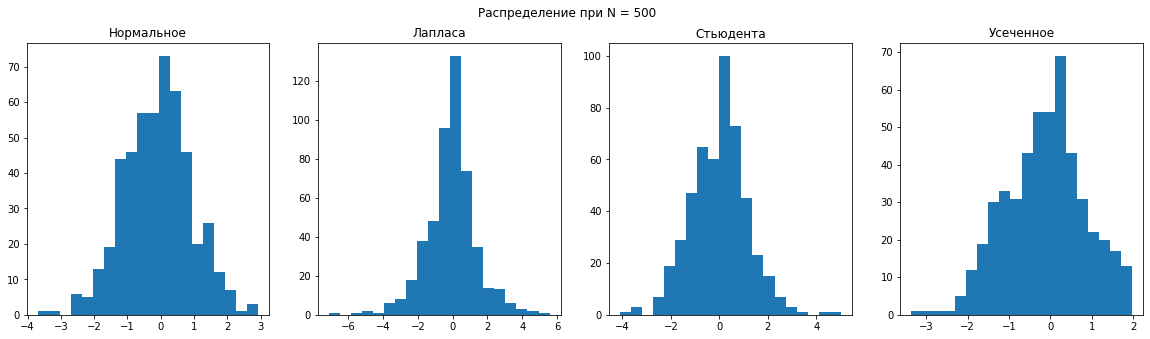

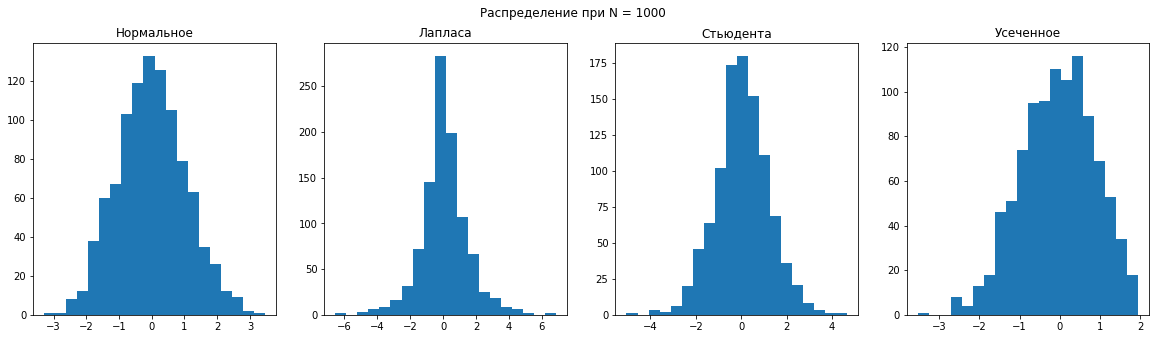

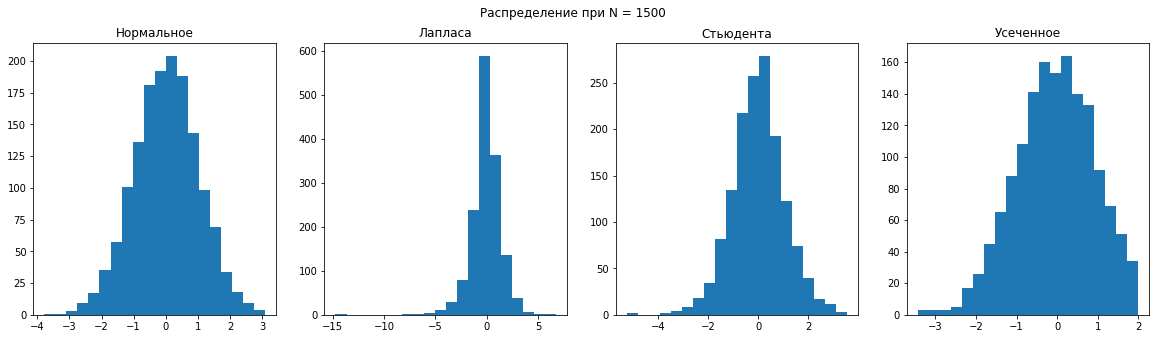

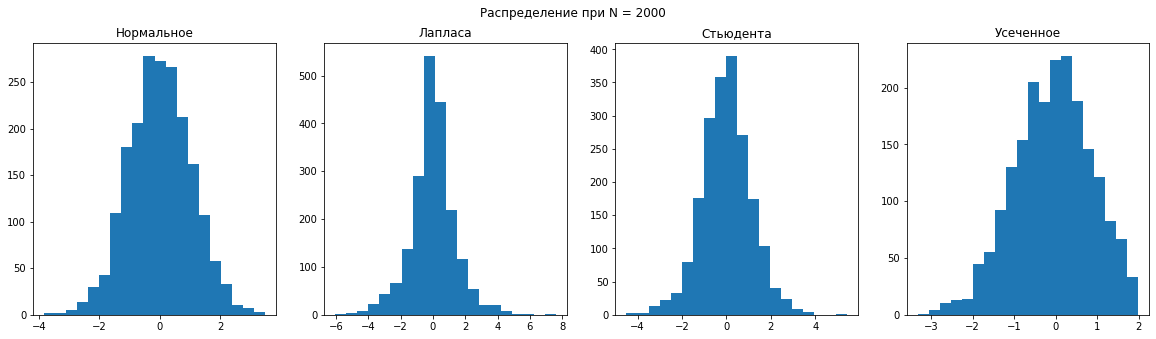

In [202]:
#task1.1 - 1
mu, sigma = 0, 1
lower, upper = -100, 2

def sample(N, show = False):
    distributions = {'Нормальное': st.norm(mu, sigma).rvs(N),
                    'Лапласа': st.laplace(mu, sigma).rvs(N),
                    'Стьюдента' : st.t(10).rvs(N),
                    'Усеченное' : st.truncnorm((-100 - mu) / sigma, (2 - mu) / sigma, loc=mu, scale=sigma).rvs(N)}
    #plot distribution

    if show == True:
        fig, axes = plt.subplots(1,4, figsize=(5*4, 5*1))
        i = 0 
        for _ in distributions:
            axes[i].hist(distributions[str(_)], bins = 20)
            axes[i].set_title(str(_))
            i += 1

        plt.suptitle('Распределение при N = {}'.format(N))
    return distributions

for N in [20, 50, 100, 500, 1000, 1500, 2000]:
    sample(N, show = True)

-------------

In [71]:
#task1.1 - 2

$H_0: \mathbf{X} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$;

$H_1: \mathbf{X} \not\sim \mathcal{N}(\mathbf{0}, \mathbf{I})$;


### Критерий Лиллиефорса

In [201]:
from statsmodels.stats.diagnostic import kstest_normal

In [197]:
Samples = {}
num = 1000 #размер сэпла
for j in range(10): 
    for i in range(num):
        for N in [20, 50, 100, 500, 1000, 1500, 2000]:
            Samples[j, i, N] = sample(N)

In [200]:
for dist in ['Нормальное','Лапласа','Стьюдента','Усеченное']:
    print('{} распределение'.format(dist), end=':\n ')
    for N in [20, 50, 100, 500, 1000, 1500, 2000]:
        print('Для выборки объемом {}'.format(N)) 
        for j in range(10):
            rejected = 0
            for i in range(num):
                d = Samples[j, i, N][dist]
                if kstest_normal(d)[1] <= 0.05:
                    rejected += 1
            print (rejected/num, end = ' ')
        print('\n')

Нормальное распределение:
 Для выборки объемом 20
0.044 0.041 0.035 0.061 0.047 0.056 0.049 0.059 0.036 0.044 

Для выборки объемом 50
0.047 0.041 0.055 0.052 0.043 0.046 0.053 0.044 0.052 0.044 

Для выборки объемом 100
0.045 0.059 0.055 0.046 0.045 0.047 0.063 0.049 0.048 0.054 

Для выборки объемом 500
0.045 0.041 0.052 0.039 0.037 0.038 0.054 0.042 0.043 0.06 

Для выборки объемом 1000
0.044 0.042 0.064 0.056 0.048 0.048 0.05 0.037 0.053 0.049 

Для выборки объемом 1500
0.043 0.052 0.04 0.041 0.052 0.049 0.044 0.046 0.047 0.037 

Для выборки объемом 2000
0.055 0.046 0.053 0.05 0.03 0.032 0.051 0.054 0.043 0.04 

Лапласа распределение:
 Для выборки объемом 20
0.23 0.231 0.21 0.237 0.215 0.197 0.216 0.199 0.204 0.218 

Для выборки объемом 50
0.438 0.408 0.44 0.418 0.46 0.419 0.412 0.434 0.434 0.442 

Для выборки объемом 100
0.711 0.689 0.706 0.707 0.693 0.703 0.698 0.73 0.686 0.706 

Для выборки объемом 500
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

Для выборки объемом 1000
1.0 1.0 1.

In [215]:
(0.044+0.041+ 0.035+ 0.061+0.047+0.056+ 0.049+ 0.059+ 0.036+ 0.044+ 

0.047+0.041+ 0.055+ 0.052+0.043+0.046+ 0.053+ 0.044+ 0.052+ 0.044+ 

0.045+0.059+ 0.055+ 0.046+0.045+0.047+ 0.063+ 0.049+ 0.048+ 0.054+ 

0.045+0.041+ 0.052+ 0.039+0.037+0.038+ 0.054+ 0.042+ 0.043+ 0.06 +

0.044+0.042+ 0.064+ 0.056+0.048+0.048+ 0.05 +0.037 +0.053 +0.049 +

0.043+0.052+ 0.04 +0.041 +0.052+0.049+ 0.044+ 0.046+ 0.047+ 0.037+ 

0.055+0.046+ 0.053+ 0.05 + 0.03+0.032+ 0.051+ 0.054+ 0.043+ 0.04)/70

0.047242857142857135

Критерий Лиллиефорса имеет небольшую мощность для выборок объема <=1500.
На Нормальном распределении сравниваем ошибку первого рода с alpha = 0.05 (метод консервативен).
Не чувствителен к различиям на хвостах распределений.

-----

### Критерий Шапиро-Уилка

In [203]:
for dist in ['Нормальное','Лапласа','Стьюдента','Усеченное']:
    print('{} распределение'.format(dist), end=':\n ')
    for N in [20, 50, 100, 500, 1000, 1500, 2000]:
        print('Для выборки объемом {}'.format(N)) 
        for j in range(10):
            rejected = 0
            for i in range(num):
                d = Samples[j, i, N][dist]
                if st.shapiro(d)[1] <= 0.05:
                    rejected += 1
            print (rejected/num, end = ' ')
        print('\n')

Нормальное распределение:
 Для выборки объемом 20
0.046 0.051 0.049 0.055 0.049 0.052 0.05 0.061 0.059 0.054 

Для выборки объемом 50
0.056 0.045 0.064 0.065 0.041 0.057 0.047 0.042 0.056 0.05 

Для выборки объемом 100
0.046 0.046 0.039 0.057 0.05 0.037 0.047 0.045 0.041 0.051 

Для выборки объемом 500
0.046 0.041 0.061 0.038 0.051 0.054 0.058 0.047 0.066 0.065 

Для выборки объемом 1000
0.063 0.045 0.044 0.059 0.046 0.058 0.064 0.043 0.046 0.053 

Для выборки объемом 1500
0.051 0.055 0.058 0.037 0.061 0.043 0.052 0.053 0.044 0.051 

Для выборки объемом 2000
0.047 0.045 0.05 0.052 0.046 0.054 0.057 0.045 0.04 0.054 

Лапласа распределение:
 Для выборки объемом 20
0.252 0.272 0.227 0.281 0.264 0.247 0.261 0.239 0.254 0.26 

Для выборки объемом 50
0.519 0.521 0.537 0.53 0.522 0.492 0.526 0.54 0.526 0.54 

Для выборки объемом 100
0.796 0.782 0.797 0.805 0.775 0.798 0.786 0.797 0.776 0.805 

Для выборки объемом 500
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

Для выборки объемом 1000
1.0 1.0 

In [214]:
(0.046+0.051+ 0.049+ 0.055+ 0.049+ 0.052+ 0.05+ 0.061+ 0.059 +0.054+ 

0.056+0.045+0.064+ 0.065 +0.041 +0.057 +0.047+ 0.042+ 0.056 +0.05 +

0.046+0.046+0.039+ 0.057 +0.05 +0.037 +0.047 +0.045 +0.041 +0.051 +

0.046+0.041+0.061+ 0.038 +0.051 +0.054 +0.058+ 0.047+ 0.066 +0.065 +

0.063+0.045+0.044+0.059+ 0.046+ 0.058+ 0.064+ 0.043+ 0.046 +0.053+ 

0.051+0.055+0.058+0.037+ 0.061+ 0.043+ 0.052+ 0.053+ 0.044 +0.051+ 

0.047+0.045+0.05+ 0.052+ 0.046 +0.054 +0.057+ 0.045+ 0.04+ 0.054) /70

0.05072857142857142

Критерий Шапиро-Уилка также не чувствителен к различиям на хвостах распределений, но имеет большую мощность на малых объемах выборки, чем Лиллиефорс, не консервативен 

---------

### Критерий Харке-Бера

In [204]:
for dist in ['Нормальное','Лапласа','Стьюдента','Усеченное']:
    print('{} распределение'.format(dist), end=':\n ')
    for N in [20, 50, 100, 500, 1000, 1500, 2000]:
        print('Для выборки объемом {}'.format(N)) 
        for j in range(10):
            rejected = 0
            for i in range(num):
                d = Samples[j, i, N][dist]
                if st.jarque_bera(d)[1] <= 0.05:
                    rejected += 1
            print (rejected/num, end = ' ')
        print('\n')

Нормальное распределение:
 Для выборки объемом 20
0.021 0.021 0.022 0.026 0.028 0.029 0.022 0.026 0.031 0.024 

Для выборки объемом 50
0.041 0.048 0.046 0.037 0.028 0.038 0.03 0.028 0.045 0.026 

Для выборки объемом 100
0.043 0.041 0.033 0.033 0.043 0.031 0.042 0.039 0.045 0.036 

Для выборки объемом 500
0.044 0.039 0.054 0.038 0.049 0.053 0.049 0.051 0.067 0.049 

Для выборки объемом 1000
0.062 0.042 0.048 0.055 0.041 0.061 0.055 0.04 0.047 0.05 

Для выборки объемом 1500
0.045 0.048 0.052 0.042 0.066 0.051 0.051 0.06 0.042 0.045 

Для выборки объемом 2000
0.039 0.047 0.049 0.049 0.051 0.054 0.058 0.036 0.044 0.056 

Лапласа распределение:
 Для выборки объемом 20
0.228 0.223 0.201 0.244 0.214 0.21 0.207 0.183 0.202 0.221 

Для выборки объемом 50
0.523 0.515 0.507 0.519 0.502 0.478 0.526 0.527 0.515 0.535 

Для выборки объемом 100
0.759 0.77 0.783 0.778 0.768 0.795 0.786 0.798 0.756 0.77 

Для выборки объемом 500
1.0 1.0 1.0 1.0 1.0 0.999 1.0 1.0 1.0 1.0 

Для выборки объемом 1000
1.0 

In [211]:
(0.021+0.021+0.022+ 0.026+ 0.028+ 0.029+ 0.022+ 0.026+ 0.031+ 0.024+ 

0.041+0.048+0.046+ 0.037+ 0.028+ 0.038+ 0.03 +0.028 +0.045 +0.026 +

0.043+0.041+0.033+ 0.033+ 0.043+ 0.031+ 0.042+ 0.039+ 0.045+ 0.036+ 

0.044+0.039+0.054+ 0.038+ 0.049+ 0.053+ 0.049+ 0.051+ 0.067+ 0.049+ 

0.062+0.042+0.048+ 0.055+ 0.041+ 0.061+ 0.055+ 0.04 +0.047 +0.05 
+
0.045+0.048+0.052+ 0.042+ 0.066+ 0.051+ 0.051+ 0.06 +0.042 +0.045 +

0.039+0.047+0.049+ 0.049+ 0.051+ 0.054+ 0.058+ 0.036+ 0.044+ 0.056 )/70

0.0426

Критерий Харке-Бера более чувствителен к различиям на хвостах распределений чем предыдушие два критерия, консервативен.